In [24]:
import numpy as np
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
N_SIDE_LENSLET=90
n = N_SIDE_LENSLET*10
tel = ceo.Telescope(n,25.5)

In [26]:
N_GS = 3
zen = np.linspace(0,ceo.constants.ARCMIN2RAD,N_GS)
src = ceo.Source('J',zenith=zen,resolution=(n,n),magnitude=14)
src.masked(tel)

In [27]:
pym = ceo.Pyramid(N_SIDE_LENSLET,n,modulation=5.0,N_GS=N_GS)

In [28]:
tid = ceo.StopWatch()
tid.tic()
pym.propagate(src)
tid.toc()
print tid.elapsedTime

7854.84960938


(1080, 360)


<matplotlib.colorbar.Colorbar instance at 0x2ab82187b050>

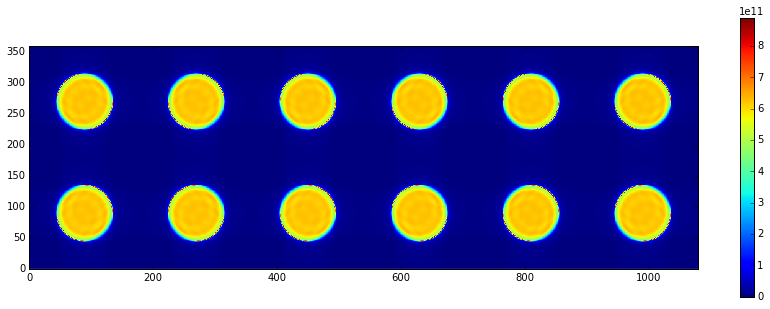

In [29]:
fig = figure()
fig.set_size_inches(15,10)
imshow(pym.camera.frame.host().T,interpolation='none',origin='lower')
print pym.camera.frame.host().shape
colorbar(shrink=0.5)